# Getting started with SCIFYsim

## Import the library

In [1]:
import scifysim as sf
import numpy as np
import matplotlib.pyplot as plt
sf.logit.setLevel(sf.logging.ERROR)
# optional (when using dark interfaces)
#plt.style.use("dark_background")
save_results = False
# Adapt to your operating system
if save_results:
    !mkdir /tmp/plots

Building a model from scratch


In [2]:
from scifysim.dummy import makesim

WARNING-astroquery- UnitsWarning: Unit 'e' not supported by the VOUnit standard. 
WARNING-astroquery- UnitsWarning: Unit 'Sun' not supported by the VOUnit standard. Did you mean uN?
ERROR-scifysim.utilities- Couldn't find the entry in JSDC catalog
Dist set to  10.786997784350653 [pc]
T set to  5263.5 [K]
R set to  0.77 [R_sun]
ERROR-scifysim.injection- Now we use fpath to provide the root for appendix config files


0.010342691863670104
sep =  4.5
pa =  60.0
offset =  (-3.897114317029973, 2.2500000000000004)
----------------------------------------
Switching to znse+co2
ERROR-scifysim.director- Correcting with only glass and CO2
inside_tuning [ 0.00000000e+00 -6.77618302e-08  0.00000000e+00 -6.77624086e-08] [ 0.         -0.00014417  0.         -0.00014417]
WARNING-astroquery- UnitsWarning: Unit 'e' not supported by the VOUnit standard. 
WARNING-astroquery- UnitsWarning: Unit 'Sun' not supported by the VOUnit standard. Did you mean uN?
ERROR-scifysim.injection- Now we use fpath to provide the root for appendix config files


0.010342691863670104
sep =  4.5
pa =  60.0
offset =  (-3.897114317029973, 2.2500000000000004)
----------------------------------------
Switching to znse+co2
ERROR-scifysim.director- Correcting with only glass and CO2
inside_tuning [ 0.00000000e+00 -6.77618302e-08  0.00000000e+00 -6.77624086e-08] [ 0.         -0.00014417  0.         -0.00014417]


## Creating the simulator

### Makesim

The macro function `makesim` builds the simulator, based mostly on the configuration file given to it. Some parameters can be overwritten by the function, in particular the target, which is here given by name.

### The configuration file

The configuration file is made of different sections, constituting different families of parameter concerning the observatory, the atmosphere, the observing sequence, the detector, ect...

In particular, an observing sequence is created given a start and end of sequence (`seq_start` and `seq_end`in `[target]`) and a number of points (`n_points` also in `[target]`), by default `update_start_end` is *True*, therefore the date will be updated to the best night to observe that target (highest elevation in the middle of the night).

## Kernel matrix

We also build a kernel matrix and store it to `asim.combiner.K`. This matrix will be used to create the relevant observables in use.


In [3]:
asim = makesim("/home/romain/Documents/hi5/SCIFYsim/scifysim/config/default_R400.ini",
               target="Gl 86A")

from kernuller import pairwise_kernel
ak = pairwise_kernel(2)
myk = np.hstack((np.zeros((1,3)), ak, np.zeros((1,3))))
asim.combiner.K = myk
del ak
del myk


ERROR-scifysim.utilities- Couldn't find the entry in JSDC catalog
Dist set to  10.786997784350653 [pc]
T set to  5263.5 [K]
R set to  0.77 [R_sun]
ERROR-scifysim.injection- Now we use fpath to provide the root for appendix config files
0.010342691863670104
sep =  4.5
pa =  60.0
offset =  (-3.897114317029973, 2.2500000000000004)
----------------------------------------
Switching to znse+co2
ERROR-scifysim.director- Correcting with only glass and CO2
inside_tuning [ 0.00000000e+00 -7.01044749e-08  0.00000000e+00 -7.01036859e-08] [ 0.         -0.00014691  0.         -0.0001469 ]
WARNING-astroquery- UnitsWarning: Unit 'e' not supported by the VOUnit standard. 
WARNING-astroquery- UnitsWarning: Unit 'Sun' not supported by the VOUnit standard. Did you mean uN?
ERROR-scifysim.injection- Now we use fpath to provide the root for appendix config files


0.010342691863670104
sep =  4.5
pa =  60.0
offset =  (-3.897114317029973, 2.2500000000000004)
----------------------------------------
Switching to znse+co2
ERROR-scifysim.director- Correcting with only glass and CO2
inside_tuning [ 0.00000000e+00 -7.01044749e-08  0.00000000e+00 -7.01036859e-08] [ 0.         -0.00014691  0.         -0.0001469 ]


## Combination scheme

The combination scheme is decided by by a keyword in the keyword `chromatic` in [configuration].

The Combiner can also be overwritten with a new one. However, keep in mind that the chromatic tuning of the correctors must be done separately if you choose to do so.

/lhome/romain/miniconda3/envs/scify/lib/python3.8/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/home/romain/Documents/kernel/kernuller/kernuller/diagrams.py:408: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


removing the labels: [False False False False False False False False]


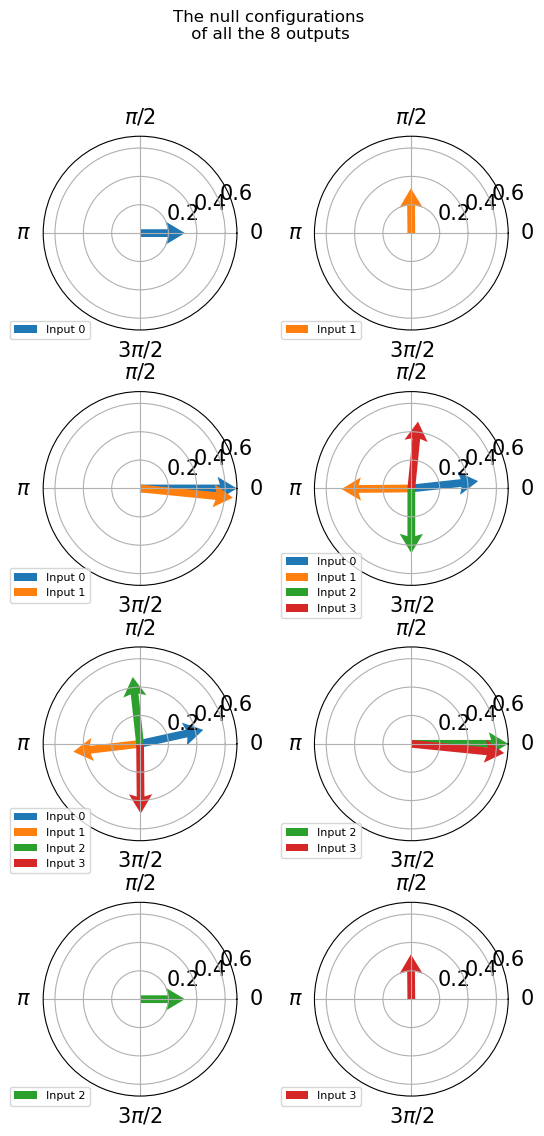

/tmp/ipykernel_44356/4274083849.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/tmp/ipykernel_44356/4274083849.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


(6, 12.5)


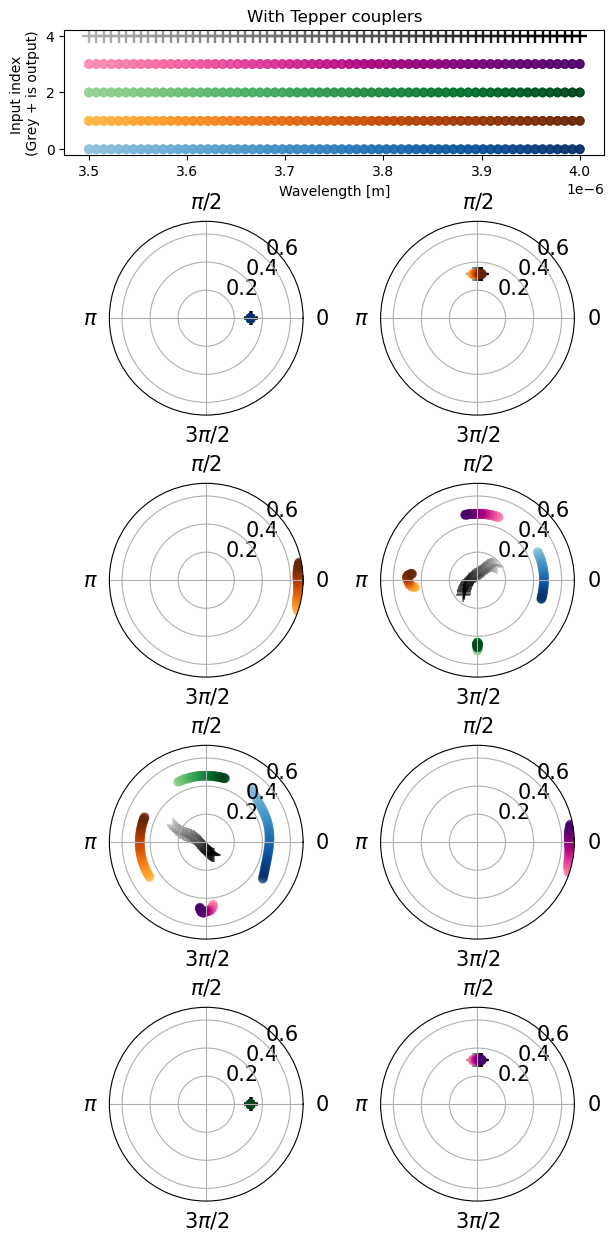

In [4]:
from kernuller.diagrams import plot_chromatic_matrix, plot_outputs_smart
# asim.combiner = sf.combiner.combiner.from_config(asim.config, ph_shifters=(0,-np.pi/2))
# asim.combiner.chromatic_matrix(asim.lambda_science_range)
# asim.point(asim.sequence[10], asim.target, refresh_array=True)

fig1, axs = plot_outputs_smart(matrix = asim.combiner.Mcn[30])
fig1.show()
fig2, axs, matrix = plot_chromatic_matrix(asim.combiner.M,
                                         sf.combiners.lamb, asim.lambda_science_range,
                                         verbose=False, returnmatrix=True,minfrac=0.9,
                                         plotout=True, show=False, title="With Tepper couplers")
fig2.show()

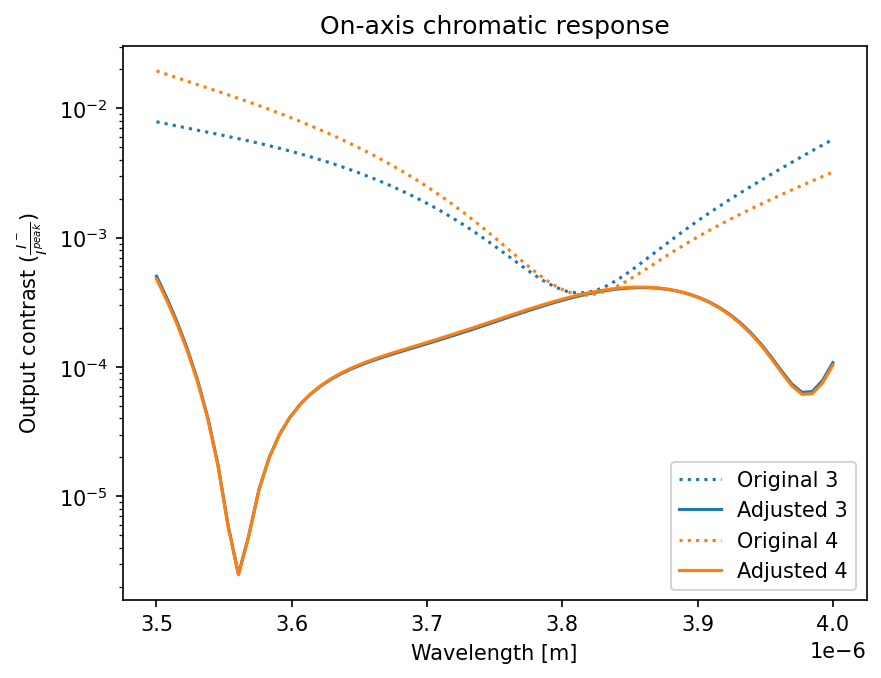

(6, 6.5)
out_switch (67, 4, 4)
inarray (67, 4)



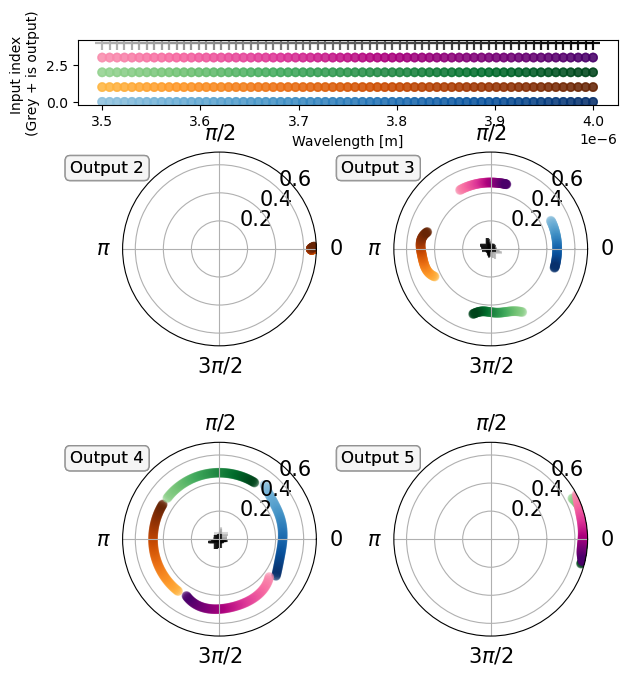

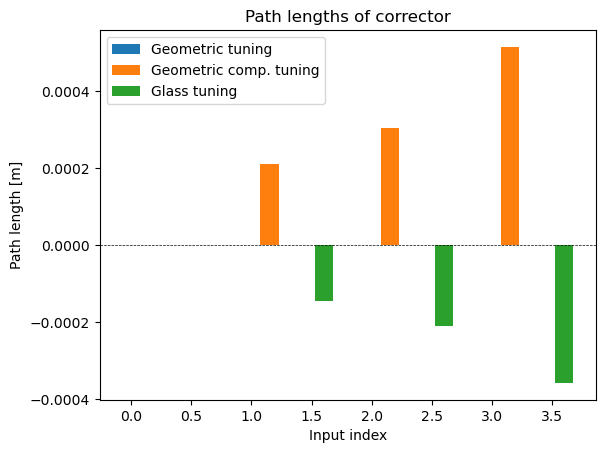

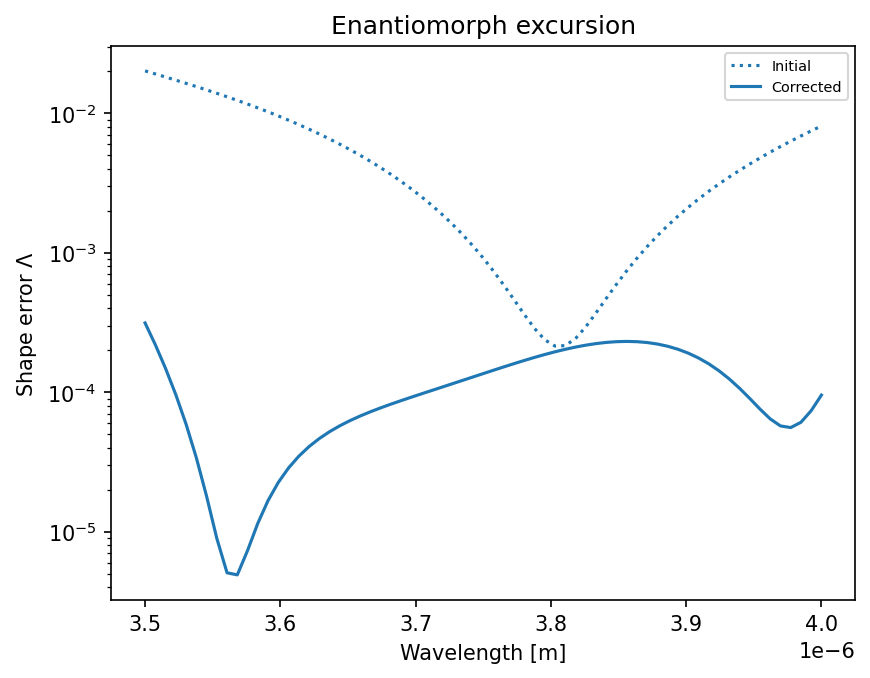

In [5]:
nul_plot, cmp_plot, bar_plot, shape_plot =\
        sf.plot_tools.plot_corrector_tuning_angel_woolf(asim.corrector, asim.lambda_science_range, asim.combiner)

In [6]:
asim.point(asim.sequence[3], asim.target)
t_exp = 3.

## Then you can start an integration

# Resolved star

* Resolved: 3 s/s
* Unresolved 1.5 s/s

In [7]:
integ = asim.make_metrologic_exposure(asim.src.planet, asim.src.star, asim.diffuse,
                                      texp=0.1)
integ.update_enclosure(asim.lambda_science_range,
                       bottom_range=2.0e-6,
                       top_range=2.6e-6)
integ = asim.make_metrologic_exposure(asim.src.planet, asim.src.star, asim.diffuse,
                                      texp=t_exp)

integ.prepare_t_exp_base()

integ.consolidate_metrologic()

100%|█████████████████████████████████████████████████████████████████████████████████| 600/600 [00:06<00:00, 93.14it/s]


<IPython.core.display.Math object>

## Nice view of the results

In [8]:
shift_step = 1/(asim.n_spec_ch+2)
outputs = np.arange(integ.summed_signal.shape[2])
isources = np.arange(len(integ.sums))
raw_sources = [integ.static[0], integ.static[1],
               integ.static[2], integ.static[3],
               integ.static, integ.starlight, integ.planetlight]
diffuse = asim.diffuse

Number of photons for the 2 dark outputs
Sky    3.3e+04  [e-/s]
UT_optics    6.8e+05  [e-/s]
Warm Optics    5.1e+05  [e-/s]
Combiner    4.0e-05  [e-/s]
Cold Optics    6.2e-05  [e-/s]
Starlight    3.6e+06  [e-/s]
Planet    0.0e+00  [e-/s]
Cold enclosure    4.6e-07   [e-/s]
Dark current    1.6e-01   [e-/s]

In total on output 1: 6.86e+06 [e-/s]
In total on output 1: 1.42e+13 [e-/s/m]
(67, 8)


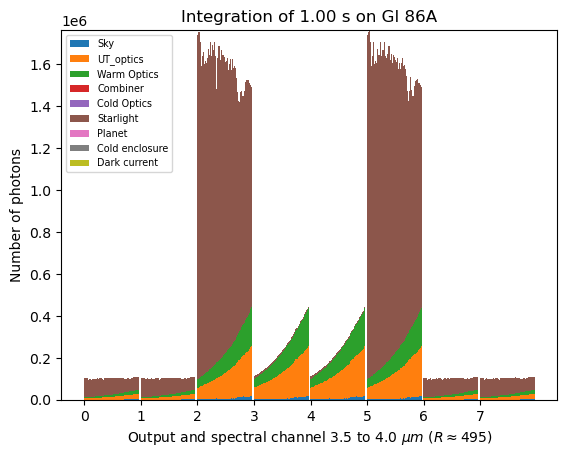



\hline
\hline
Source & Temperature & Mean transmission & Contribution\tablefootmark{a}\\ 
 & [K] & & $[e^- s^-1]$\\
\hline
Enclosure & 100.0 & N.A. & 4.63e-07 \\
Dark current & 60.0 & N.A. & 1.07e+01 \\
\hline
\tablefoot{
\tablefoottext{a}{On one dark output, cumulated over all wavelength bands}
\tablefoottext{b}{For R=400}
}


In [9]:
print("Number of photons for the 2 dark outputs")
for i, label in enumerate(integ.source_labels):
    #print(label + " %.1e [ph/s]"%(integ.sums[i].sum()))
    detail = integ.sums[i].sum(axis=0)[1] * integ.eta
    print(label + "    %.1e  [e-/s]"%(detail ))
for i, label in enumerate(integ.det_labels):
    #print(label + " %.1e [ph/s]"%(integ.sums[i].sum()))
    detail = integ.det_sources[i].sum(axis=0)
    print(label + "    %.1e   [e-/s]"%(detail) )

print("")
fav_output = 1
mynpix = asim.config.getfloat("spectrograph", "n_pix_split")
supsum = np.nan_to_num(np.array(integ.sums))
print(f"In total on output {fav_output}: {supsum.sum(axis=(0,1))[fav_output]:.2e} [e-/s]")
maxbin = np.max(supsum.sum(axis=0), axis=0)

# To be portable per for different resolutions:
max_density = maxbin/np.gradient(asim.lambda_science_range).mean()
print(f"In total on output {fav_output}: {max_density[fav_output]:.2e} [e-/s/m]")

fig = sf.plot_tools.plot_output_sources(asim, integ, asim.lambda_science_range, t_exp=1.)

print()
print()
print(f"\\hline")
print(f"\\hline")
print("Source & Temperature & Mean transmission & Contribution\\tablefootmark{a}\\\\ ")
print(f" & [K] & & $[e^- s^{-1}]$\\\\")
print(f"\\hline")
for i, (asource,aname) in enumerate(zip(diffuse, integ.static_list)):
    pass
    # print(f"{aname} & {asource.T:.1f} & {asource.trans(asim.lambda_science_range).mean():.2f} & {integ.sums[i].sum(axis=0)[3]:.2e} \\\\")

print(f"Enclosure & {integ.enclosure.T:.1f} & N.A. & {integ.det_sources[0].sum():.2e} \\\\")
print(f"Dark current & {60.:.1f} & N.A. & {integ.det_sources[1]*integ.det_sources[0].shape[0]:.2e} \\\\")
print(f"\\hline")

print(f"\\tablefoot{{")
print(f"\\tablefoottext{{a}}{{On one dark output, cumulated over all wavelength bands}}")
print(f"\\tablefoottext{{b}}{{For R=400}}")    
print(f"}}")
    

Beam-combination scheme

# Maps

## Description
The transmission maps are an important way to interface with the simulator. The maps represent the entire transmission of the instrument as a function of the relative position in the field of view. More precisely, they represent the equivalent collecting power of the whole observatory setup.

In `<simulator>.maps`, the values are stored in $m^2/sr$ representing where the solid angle prepresent the area of a pixel. It has shape $n_{chunks}, n_{chanels}, n_{outputs}, n_{pix}, n_{pix}$

For convenience, a property is available as an astropy quantity under `<simulator>.gain_map`, with units $m^2 e^-/ph$, as it includes the effect of quantum efficiency.

## Alternative backend
The maps can grow large in memory. SCIFYsim offers an alternative backend using **Dask**. [Dask](https://www.dask.org/) is a lazy and out-of-core library based of numpy. It breaks down the maps in smaller chunks and computes only at the last moment, when simplifications can be made. It can be called with `<simulator>.build_all_maps_dask`

In [ ]:
%%time
asim.build_all_maps(mapres=200, mapcrop=0.5)

In [ ]:
asim.maps.shape

In [ ]:
print(asim.gain_map.shape)
print(asim.gain_map.unit)

In [ ]:
fig = sf.plot_tools.plot_response_map(asim, sequence_index=[0],
                                outputs=np.array([3,4]),
                                dpi=200, layout="v", show=False,
                                     figsize=(3,8))
plt.tight_layout()
plt.show()

# Regular integrations

In [ ]:
dit = 1.

In [ ]:
integ = asim.make_exposure(asim.src.planet, asim.src.star, diffuse,
                                texp=dit,
                                monitor_phase=False,
                               spectro=asim.spectro)

Compute a large number of frames to obtain an estimate of the errors

In [ ]:
from tqdm import tqdm
n_frames = 100
mynpix = 8
diffuse = [asim.src.sky, asim.src.UT, asim.src.warm_optics, asim.src.combiner, asim.src.cold_optics]
screen_age = 0.
reveta = 1/integ.eta
full_record = True
datacube = []
dit_intensity = []
starlights = []
planetlights = []
for i in tqdm(range(n_frames)):
    if screen_age>=20. :
        print("generating screen")
        asim.injector.update_screens()
        screen_age = 0.
    integ = asim.make_exposure(asim.src.planet, asim.src.star, diffuse,
                                texp=dit,
                                monitor_phase=False,
                               spectro=None)
    datacube.append(integ.get_total(spectrograph=None,
                                    t_exp=dit,
                                    n_pixsplit=mynpix))
    dit_intensity.append(reveta * integ.forensics["Expectancy"].sum(axis=0))
    if full_record:
        starlights.append(integ.starlight.astype(np.float32))
        planetlights.append(integ.planetlight.astype(np.float32))
    integ.reset() # This can be removed after new kernel start
    screen_age += dit
datacube = np.array(datacube)
dit_intensity = np.array(dit_intensity)
starlights = np.array(starlights)
planetlights = np.array(planetlights)

## The combiner matrix

In [ ]:
asim.point(asim.sequence[3], asim.target)

In [ ]:
from kernuller import pairwise_kernel
ak = pairwise_kernel(2)
myk = np.hstack((np.zeros((1,3)), ak, np.zeros((1,3))))
asim.combiner.K = myk


diffobs = np.einsum("ij, mkj->mk",asim.combiner.K, dit_intensity)
diff_std = np.std(diffobs, axis=0)

In [ ]:
integ.reset()
integ = asim.make_exposure(asim.src.planet, asim.src.star, diffuse,
                                texp=dit,
                                monitor_phase=False,
                               spectro=None)
block = integ.get_total(spectrograph=None,t_exp=dit, n_pixsplit=mynpix)
print(f"datacube shape: {datacube.shape}")
print(f"dit = {dit} s")
brigh_max = np.max(np.mean(integ.forensics["Expectancy"][:,:,asim.combiner.bright], axis=0))
dark_max = np.max(np.mean(integ.forensics["Expectancy"][:,:,asim.combiner.dark], axis=0))
longest_exp_bright = 65000 / (brigh_max/dit)
longest_exp_dark = 65000 / (dark_max/dit)
print(f"Bright limit: {longest_exp_bright:.2f} s\n Dark limit: {longest_exp_dark:.2f} s")
data_std = np.std(datacube, axis=0)
diff_std = np.std(datacube[:,:,3]-datacube[:,:,4], axis=0)

integ.static = asim.computed_static
integ.mean_starlight = np.mean(starlights, axis=0)
integ.mean_planetlight = np.mean(planetlights, axis=0)
integ.mean_intensity = np.mean(dit_intensity, axis=0)

In [ ]:
prof = sf.analysis.noiseprofile(integ, asim, diffobs, n_pixsplit=mynpix)
fig = prof.plot_noise_sources(asim.lambda_science_range, dit=1., show=False,
                             ymin=0.2, ymax=1.)
plt.legend(loc="upper right", fontsize="xx-small")

if save_results:
    plt.savefig("/tmp/plots/noises.pdf", bbox_inches='tight', dpi=200)
plt.show()